Name: Ashwini Giri

USC ID: 5413882039

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Blood Transfusion Service Center Data Set from: https://archive. ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center. This data has two output classes.Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

imports for all question

In [2]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

loading data into dataframe

In [3]:
dataframe = pd.read_csv('blood_transfusion.csv')
dataframe.head()

,Recency,Frequency,Monetary,Time,donated_blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


seperating data of class 1 and class 0

In [4]:
positive = dataframe.loc[dataframe['donated_blood']==1]
negative = dataframe.loc[dataframe['donated_blood']==0]
number_of_rows_pos = positive.shape[0]
number_of_rows_neg = negative.shape[0]

creating train and test data by selecting first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [5]:
pos_split = math.ceil(number_of_rows_pos*0.2)
neg_split = math.ceil(number_of_rows_neg*0.2)
pos = np.split(positive,[pos_split],axis=0)
neg = np.split(negative,[neg_split],axis=0)
positive_test = pos[0]
positive_train = pos[1]
negative_test = neg[0]
negative_train = neg[1]
testing_dataframe = pd.concat([positive_test,negative_test])
training_dataframe = pd.concat([positive_train,negative_train])

In [6]:
semi = training_dataframe

(b) Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the accuracy, AUC, ROC, and confusion matrix for both training and test sets.

seperating data into train data, train labels, test data and test labels

In [7]:
dfs = np.split(training_dataframe,[-1],axis=1)
training_dataframe = dfs[0]
training_dataframe_label = dfs[1]
dfs1 = np.split(testing_dataframe,[-1],axis=1)
testing_dataframe = dfs1[0]
testing_dataframe_label = dfs1[1]

normalizing data using MinMaxScalar

In [8]:
#normalizing data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
new_train = scalar.fit_transform(training_dataframe)
new_test = scalar.fit_transform(testing_dataframe)
scalar_training_dataframe = pd.DataFrame(new_train,columns=training_dataframe.columns)
scalar_testing_dataframe = pd.DataFrame(new_test,columns=testing_dataframe.columns)

normalizing data using StandardScalar

In [9]:
from sklearn.preprocessing import StandardScaler
stdscr = StandardScaler()
new_tr = stdscr.fit_transform(training_dataframe)
new_ts = stdscr.fit_transform(testing_dataframe)
std_training_dataframe = pd.DataFrame(new_tr,columns=training_dataframe.columns)
std_testing_dataframe = pd.DataFrame(new_ts,columns=training_dataframe.columns)

In [10]:
scalar_training_dataframe.head()

,Recency,Frequency,Monetary,Time
0,0.027027,0.162791,0.162791,0.343750
1,0.054054,0.093023,0.093023,0.145833
2,0.027027,0.046512,0.046512,0.072917
3,0.027027,0.069767,0.069767,0.125000
4,0.054054,0.372093,0.372093,0.718750


In [11]:
scalar_testing_dataframe.head()

,Recency,Frequency,Monetary,Time
0,0.153846,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.076923,0.306122,0.306122,0.343750
3,0.153846,0.387755,0.387755,0.447917
4,0.153846,0.122449,0.122449,0.125000


normalizing data using normalize

In [12]:
normalized_training_dataframe = preprocessing.normalize(training_dataframe)
normalized_testing_dataframe = preprocessing.normalize(testing_dataframe)
normalized_training_dataframe=pd.DataFrame(normalized_training_dataframe,columns=training_dataframe.columns)
normalized_testing_dataframe=pd.DataFrame(normalized_testing_dataframe,columns=testing_dataframe.columns)

In [13]:
normalized_training_dataframe.head()

,Recency,Frequency,Monetary,Time
0,0.001000,0.003999,0.999838,0.017497
1,0.003200,0.004000,0.999905,0.012799
2,0.002666,0.004000,0.999916,0.011999
3,0.002000,0.004000,0.999892,0.013998
4,0.000941,0.003999,0.999852,0.016703


In [14]:
normalized_testing_dataframe.head()

,Recency,Frequency,Monetary,Time
0,0.000160,0.004,0.999961,0.007840
1,0.000000,0.004,0.999955,0.008615
2,0.000250,0.004,0.999954,0.008750
3,0.000400,0.004,0.999951,0.009000
4,0.001143,0.004,0.999959,0.008000


In [15]:
index_train = list(range(0,598))
index_test = list(range(0,150))
scalar_training_dataframe_label = training_dataframe_label.set_index([index_train])
scalar_testing_dataframe_label = testing_dataframe_label.set_index([index_test])

In [16]:
total = scalar_training_dataframe_label.values
total_df = scalar_training_dataframe
total_df['blood'] = total
total_df=total_df.sample(frac=1)

In [17]:
total_test = scalar_testing_dataframe_label.values
total_df_test = scalar_testing_dataframe
total_df_test['blood'] = total_test
total_df_test=total_df_test.sample(frac=1)

training L1 penalized SVM and choosing the penalty parameter using 5 fold cross validation

In [18]:
classifier=LinearSVC(penalty='l1', dual=False)
penalty_parameters={'C':[0.001,0.01,0.1,1,10,100,500,1000]}
cross_val=GridSearchCV(classifier,penalty_parameters,cv=5)
cross_val.fit(total_df.loc[:,:'Time'],total_df['blood'])
print(cross_val.best_params_)
prediction=cross_val.predict(total_df_test.loc[:,:'Time'])

{'C': 1}


In [19]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

calculating accuracy 

In [20]:
acc = accuracy_score(total_df_test['blood'],prediction)
print("Accuracy for Supervised learning using L1 penalized SVM: ",acc)

Accuracy for Supervised learning using L1 penalized SVM:  0.7666666666666667


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import itertools

In [31]:
def plotConfusionMatrix(cm):
    class_names = np.array([0,1])

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    cnf_matrix = cm
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')

    plt.show()

Confusion Matrix for Supervised Learning

Confusion Matrix for Supervised Learning


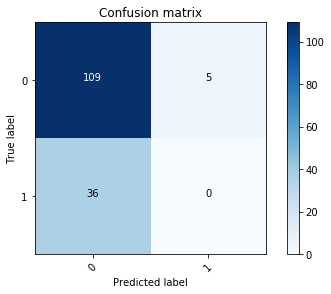

In [32]:
cm=confusion_matrix(testing_dataframe_label,prediction)
print("Confusion Matrix for Supervised Learning")
plotConfusionMatrix(cm)
# plotROC(train_dfs)

In [28]:
def plot_roc_curve(y_true, y_predict_scores, charname):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    #for i in range(n_classes):
    fpr[2], tpr[2], _ = roc_curve(y_true, y_predict_scores, drop_intermediate=False)
    roc_auc[2] = auc(fpr[2], tpr[2])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_predict_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(charname)
    plt.legend(loc="lower right")
    plt.savefig(charname)

plotting ROC, AUC curve for Supervised learning

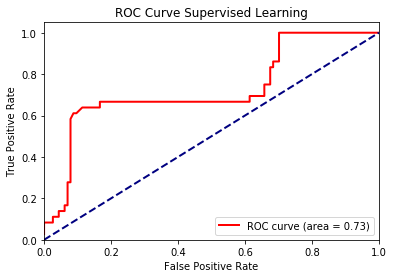

In [30]:
plot_roc_curve(total_df_test['blood'],cross_val.decision_function(total_df_test.loc[:,:'Time']),'ROC Curve Supervised Learning')
plt.show()

(c) Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [33]:
semi.head()

,Recency,Frequency,Monetary,Time,donated_blood
61,2,8,2000,35,1
63,4,5,1250,16,1
64,2,3,750,9,1
66,2,4,1000,14,1
72,4,17,4250,71,1


In [34]:
semi_pos = semi.loc[semi['donated_blood']==1]
semi_neg = semi.loc[semi['donated_blood']==0]

creating labelled and unlabelled data as specified in the question.

In [35]:
semi_pos_labelled = semi_pos.sample(frac=0.5)
semi_pos_unlabelled = semi_pos.loc[~semi_pos.index.isin(semi_pos_labelled.index)]
semi_neg_labelled = semi_neg.sample(frac=0.5)
semi_neg_unlabelled = semi_neg.loc[~semi_neg.index.isin(semi_neg_labelled.index)]
frames = [semi_pos_labelled,semi_neg_labelled]
semi_pos_train_labelled = pd.concat(frames)
frames = [semi_pos_unlabelled,semi_neg_unlabelled]
semi_pos_train_unlabelled = pd.concat(frames)

In [36]:
dfs = np.split(semi_pos_train_labelled,[-1],axis=1)
labelled_predictors = dfs[0]
labelled_target = dfs[1]
dfs = np.split(semi_pos_train_unlabelled,[-1],axis=1)
unlabelled_predictors = dfs[0]
unlabelled_target = dfs[1]

In [37]:
semi_pos_train_labelled = semi_pos_train_labelled.sample(frac = 1)
semi_pos_train_unlabelled = semi_pos_train_unlabelled.sample(frac = 1)

In [38]:
scalar1 = MinMaxScaler()
new_train1 = scalar.fit_transform(labelled_predictors)
new_test1 = scalar.fit_transform(unlabelled_predictors)
scalar_labelled_dataframe = pd.DataFrame(new_train1,columns=labelled_predictors.columns)
scalar_unlabelled_dataframe = pd.DataFrame(new_test1,columns=unlabelled_predictors.columns)

In [39]:
total1 = labelled_target.values
total_df1 = scalar_labelled_dataframe
total_df1['blood'] = total1
total_df1=total_df1.sample(frac=1)

In [40]:
total2 = unlabelled_target.values
total_df1_un = scalar_unlabelled_dataframe
total_df1_un['blood'] = total2
total_df1_un=total_df1_un.sample(frac=1)

In [41]:
index=list(range(0,299))
total_df1 = total_df1.set_index([index])
total_df1_un = total_df1_un.set_index([index])

In [42]:
sp = np.split(total_df1,[-1],axis=1)
sp1 = np.split(total_df1_un,[-1],axis=1)
normalized_labelled = sp[0]
labelled_target=sp[1]
normalized_unlabelled = sp1[0]
unlabelled_target = sp1[1]

i. Train an L1-penalized SVM to classify the labeled data. Choose the penalty parameter using 5 fold cross validation.

Training SVM using L1-penalized data and choosing penalty parameter using 5 fold cross validation.

In [48]:
classifier=LinearSVC(penalty='l1', dual=False)
penalty_parameters={'C':[0.08,0.008,0.8,5,10,45,345,764,1000]}
cross_val=GridSearchCV(classifier,penalty_parameters,cv=5)
cross_val.fit(normalized_labelled,labelled_target)
pred = cross_val.predict(normalized_unlabelled)
print(cross_val.best_params_)
pred

{'C': 10}


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

ii. Find the unlabeled data point that is the closest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and report the accuracy, AUC, ROC, and confusion matrix for the test set.

In [49]:
best_parameters = []

In [50]:
norm_lab_target = labelled_target
norm_unlab_target = unlabelled_target
true_labels = labelled_target

adding the unlabelled data to labelled data

In [51]:
length = normalized_unlabelled.shape[0]
for i in range(0,length):
    cross_val.fit(normalized_labelled,norm_lab_target)
    prediction = cross_val.predict(normalized_unlabelled)
#     print(prediction)
    
    support_vector_distance=cross_val.decision_function(normalized_unlabelled)
    support_vector_distance = abs(support_vector_distance)
#     print(support_vector_distance)
    distance = support_vector_distance.argsort()[:1]
#     print('prediction length',len(prediction))
#     print('distance matrix lenght',len(support_vector_distance))
#     print('distance index: ',distance)
#     print('distance: ',support_vector_distance[distance])
    
    closest_dataframe = normalized_unlabelled.iloc[distance]
#     print('closest_dataframe: ',closest_dataframe)
    
    closest_true_label = norm_unlab_target.iloc[distance]
    svm_pred = prediction[distance]
    
#     print(closest_true_label)
#     print('svm_pred: ',svm_pred)
    
    #all appends
    normalized_labelled=normalized_labelled.append(closest_dataframe)
    norm_lab_target=norm_lab_target.append(closest_true_label)
    norm_lab_target.iloc[-1]=svm_pred 
    true_labels=true_labels.append(closest_true_label)
    
    #all drops
    normalized_unlabelled = normalized_unlabelled.drop(normalized_unlabelled.index[distance])
    norm_unlab_target = norm_unlab_target.drop(norm_unlab_target.index[distance])
#     print("_______________________________________________________________")

In [52]:
norm_lab_target.shape[0]

598

In [ ]:
cross_val.fit(normalized_labelled,norm_lab_target)
prediction_uns = cross_val.predict(total_df_test.loc[:,:'Time'])
accuracy = accuracy_score(total_df_test['blood'],prediction_uns)

In [54]:
print("Accuracy using Semi-Supervised learning is: ",accuracy)

Accuracy using Semi-Supervised learning is:  0.7866666666666666


Confusion matrix for Semi-Supervised Learning


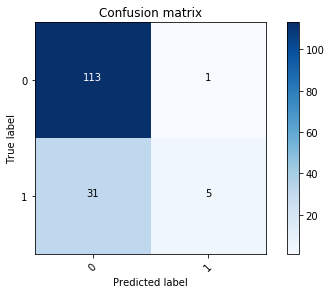

In [55]:
cm=confusion_matrix(total_df_test['blood'],prediction_uns)
print("Confusion matrix for Semi-Supervised Learning")
plotConfusionMatrix(cm)

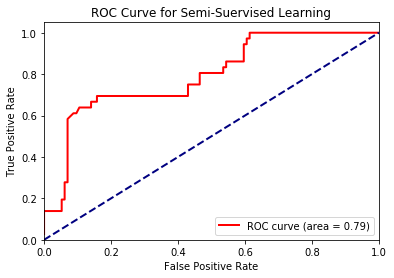

In [56]:
plot_roc_curve(total_df_test['blood'],cross_val.decision_function(total_df_test.loc[:,:'Time']),'ROC Curve for Semi-Suervised Learning')
plt.show()

(d) Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

In [57]:
train = total_df
test = total_df_test
i = list(range(0,598))
j = list(range(0,150))
train = train.set_index([i])
test = test.set_index([j])

In [58]:
a = np.split(train,[-1],axis=1)
b= np.split(test,[-1],axis=1)
train_df = a[0]
train_label = a[1]
test_df = b[0]
test_label = b[1]

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters=2).fit(train_df)
pr = kmeans.predict(test_df)
accr = accuracy_score(test_label,pr)
accr

0.36666666666666664

i. Run the k-means algorithm multiple times. How do you make sure that the algorithm was not trapped in a local minimum?

running the algorithm 80 times

In [61]:
kmeans1 = KMeans(n_clusters=2,n_init=80).fit(train_df)
pr1 = kmeans1.predict(test_df)
accr1 = accuracy_score(test_label,pr1)
accr1

0.6333333333333333

ii. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k- means with the true labels of the training data and report accuracy and the confusion matrix.1

centers of two clusters

In [62]:
kmeans1.cluster_centers_

array([[0.15, 0.04, 0.04, 0.2 ],
       [0.15, 0.19, 0.19, 0.64]])

distance of data points from center

In [63]:
distance = kmeans1.transform(train_df)

In [64]:
center1 = distance[:,0]
center2 = distance[:,1]

calculating 30 closest data points to each center

In [67]:
center1_30 = center1.argsort()[:30]
center2_30 = center2.argsort()[:30]
print(center1_30)
print(center2_30)

[285 362 348 136 125 473  99 346 571  72 366 183  10 371 575 319 101 120
 494 316 141 169  29 151 317 420 112 379  57 349]
[562 400 550 534  23  89 409 509 257 134 452 474 590   5 596 499 466 359
 549 332 116 135 122 514  39 565 580 438  48 137]


In [68]:
cluster1_truelabels = pd.DataFrame(columns=train_label.columns)
cluster2_truelabels = pd.DataFrame(columns=train_label.columns)
for i in center1_30:
    cluster1_truelabels.loc[i] = train_label.iloc[i]
for i in center2_30:
    cluster2_truelabels.loc[i] = train_label.iloc[i]

In [69]:
cluster2_truelabels['blood'].value_counts()

0.0    24
1.0     6
Name: blood, dtype: int64

In [70]:
cluster1_truelabels['blood'].value_counts()

0.0    22
1.0     8
Name: blood, dtype: int64

As seen above by taking majority pooling the label predicted by majority pooling for both the clusters is '0'. Since the data is highly imbalanced, hence kmeans predicts same label for both the clusters.

In [76]:
labels = kmeans1.labels_
labels_df = pd.DataFrame(labels,columns=['blood'])

In [80]:
accuracy_unsupervised = accuracy_score(train_label,labels_df)
print("Accuracy of unspervised learning is: ",accuracy_unsupervised)

Accuracy of unspervised learning is:  0.5769230769230769


Confusion matrix for UnSupervised Learning


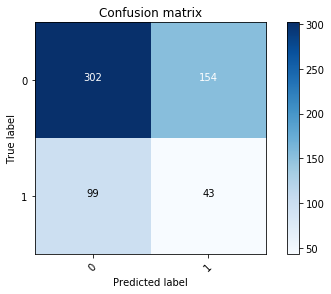

In [101]:
cm=confusion_matrix(train_label,labels_df)
print("Confusion matrix for UnSupervised Learning")
plotConfusionMatrix(cm)

iii. Classify test data based on their proximity to the centers of the clusters. Report accuracy and confusion matrix for the test data.

classifying the test data based on their proximity to the centers.

In [91]:
distance_test = kmeans1.transform(test_df)
close_center1 = distance_test[:,0]
close_center2 = distance_test[:,1]

In [95]:
center1_closest = close_center1.argsort()[:75]
center2_closest = close_center2.argsort()[:75]
print(center1_closest)
print(center2_closest)

[ 47 114  13  59   8   1  32  99  66  97  25  39  63  67  29 139  84 105
  22 101 109 135   0  37  88  16 143  40  41   7  79 121  56  17   5  89
  74  51  64  55 108  57 125 130  73  80  34  45   6 127 141  49 100 126
  11  68  92 103  72  78 116 148  18  20  85  12 149  19 122  31   3 133
  86 118 119]
[ 70 107  36 128 104  69 144  30 137  83 111 140 132  48  58 110  14   4
  15 145  94 147  75 112 102  65  52  90 120 134  21  91  55  43  76 115
 146  10 121 106 113  56 117  44 142 103  79  17  27  41 109 131  61  54
  87  24  38 126  25  97  28 129  62 135 108  59  13  89  49 139   5  16
 127  72  74]


In [96]:
cluster1_testdata = pd.DataFrame(columns=test_df.columns)
cluster2_testdata = pd.DataFrame(columns=test_df.columns)
for i in center1_closest:
    cluster1_testdata.loc[i] = test_df.iloc[i]
for i in center2_closest:
    cluster2_testdata.loc[i] = test_df.iloc[i]

test data close to center1 is cluster1_testdata and data close to center2 is stored in cluster2_testdata.

In [98]:
pred = kmeans1.predict(test_df)
accuracy_kmeans_test = accuracy_score(test_label,pred)
print("Accuracy of test data sing K-means is: ",accuracy_kmeans_test)

Accuracy of test data sing K-means is:  0.6333333333333333


Confusion matrix for test data using K-means


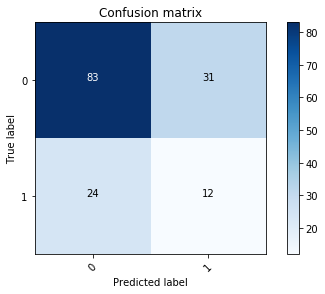

In [100]:
cm=confusion_matrix(test_label,pred)
print("Confusion matrix for test data using K-means")
plotConfusionMatrix(cm)

(f) One expects that supervised learning on the full data set works better than semi- supervised learning with half of the data set labeled.One expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [107]:
accuracy_df = pd.DataFrame(columns=['Supervised Learning','Semi-Supervised Learning','Train data Unsupervised Learning','Test data Unsupervised Learning'])
row = [acc,accuracy,accuracy_unsupervised,accuracy_kmeans_test]
accuracy_df.loc[0] = row
print("Summarized Accuracy for all types of Learning in this Excercise")
accuracy_df

Summarized Accuracy for all types of Learning in this Excercise


,Supervised Learning,Semi-Supervised Learning,Train data Unsupervised Learning,Test data Unsupervised Learning
0,0.766667,0.786667,0.576923,0.633333


My results obtained are slightly different than as expected. For the data I trained the supervised learning performs a little worse than the semi-supervised learning. The accuracy of supervised learning is approximately 76% and that of semi-supervised learning is approximately 78%. Hence for my observation semi-supervised learning is performing better than supervised learning. However there is no doubt that the unsupervised learning performs the worst of all. The accuracy using K-means is the lowest and observed as approximately 57% in this experiment. K-means is assigning same labels to both clusters using majority pooling. Hence we can confirm that unsupervised learning underperforms the supervised and semi-supervised learning. 